In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(engine,reflect=True)


# reflect the tables

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

In [11]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.
prcps=session.query(Measurement.date, func.avg(Measurement.prcp)).group_by(Measurement.date).filter(Measurement.date>='2016-08-23').order_by(Measurement.date).all()

    


In [12]:
session.query(Measurement.date, func.avg(Measurement.prcp)).group_by(Measurement.date).filter(Measurement.date>='2016-08-23').order_by(Measurement.date).all()

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [13]:
# Convert your results into a pandas DataFrame with date as index.
df = pd.DataFrame(prcps, columns=['date', 'precipitation'])
df.set_index('date', inplace=True, )
df.head(10)

,precipitation
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
2016-08-29,0.243333
2016-08-30,0.011667
2016-08-31,0.636000


<Figure size 1440x216 with 0 Axes>

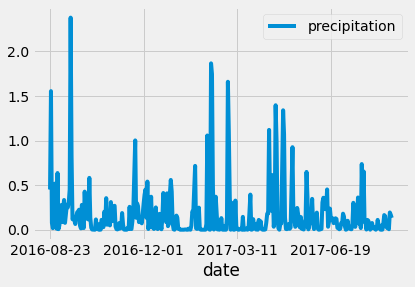

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(20,3))
bar_plot=df.plot(kind='line')
plt.savefig("images-sol/precipitation.png")


In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data

summary_prcp = df[["precipitation"]]

summary_prcp.describe()

,precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [79]:
# Query total number of stations in dataset
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [105]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#session.query(MyClass.name, MyClass.id, func.count(MyClass.something)).group_by(MyClass.name, MyClass.id)
#session.query(Measurement).group_by(Measurement.station).count()
#session.query(Measurement).filter(Measurement.station=='USC00513117').count()
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [110]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.
avg_temp=session.query(func.avg(Measurement.tobs)).all()
lowest=session.query(Measurement.tobs).order_by(Measurement.tobs).first()
highest=session.query(Measurement.tobs).order_by((Measurement.tobs).desc()).first()
print(avg_temp,lowest,highest)

[(73.09795396419437,)] (53.0,) (87.0,)


In [18]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.
recent_date=session.query(Measurement.date).filter_by(station='USC00519281').order_by(Measurement.date.desc()).first()
tobs_for12months=session.query(Measurement.tobs).filter(Measurement.date>='2016-08-18').all()
tobs_list=[]
for tob in tobs_for12months:
    tobs_list.append(tob.tobs)



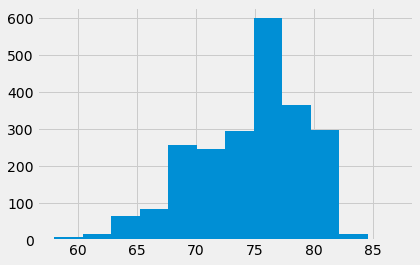

In [19]:
plt.hist(tobs_list, 12)
plt.savefig("images-sol/station_histogram.png")

# Close session

In [23]:
session.close()